Phase shift at 200 MeV: 0.05140078728972285 radians


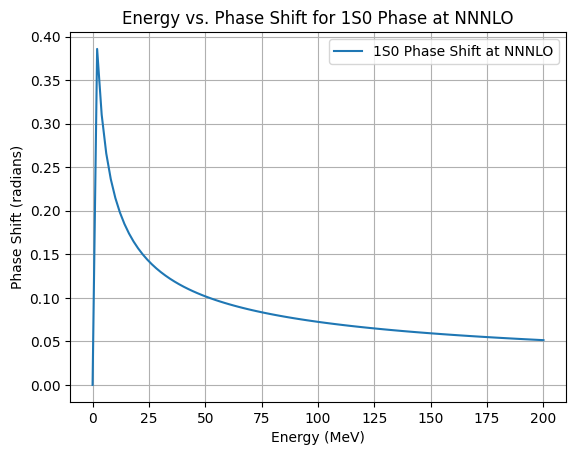

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define physical constants
MPI = 2.0 * 0.1395702 / 3.0 + 0.1349766 / 3.0
MPICH = 0.1395702
MPIN = 0.1349766
MN = 0.9395653
MP = 0.9382720
MMM = 2.0 * MP * MN / (MP + MN)
FFAK = 0.197327053
FPI = 0.0924
GA = 1.29
CUTPOT = 6.0
PI = np.pi
FAKVCC = -3.0 / (16.0 * PI**2 * FPI**4)
FAKVCT = -1.0 / (96.0 * PI**2 * FPI**4)
FAKREL = 1.0 / (192.0 * PI**2 * MMM * FPI**4)

class ChiralPotential:
    def __init__(self, ostat, force, rel, qpun1, qpun2, jmom, cutnum):
        self.ostat = ostat
        self.force = force
        self.rel = rel
        self.qpun1 = qpun1
        self.qpun2 = qpun2
        self.jmom = jmom
        self.cutnum = cutnum
        self.alpha = 1.0 / 137.036
        self.kappap = 1.792847
        self.kappan = -1.913043
        self.bet = self.alpha * self.kappan * (1.0 + self.kappap) / (4.0 * MN * MP * (4.0 * PI))
        self.gam = -self.alpha * self.kappan / (MN * MMM * (4.0 * PI))

    def vmagmom(self):
        vmm1 = 4.0 / 3.0 * PI * self.bet / 1000000.0
        ratio = self.qpun2 / self.qpun1
        if abs(self.qpun1 - self.qpun2) >= 0.000001:
            vpp1 = -8.0 / 315.0 * (2.0 * self.bet - 3.0 * self.gam * (ratio if ratio > 0.01 else 0.01))
        else:
            vpp1 = 0.0
        vmp1, vpm1 = 0.0, 0.0
        return vmm1, vmp1, vpm1, vpp1

    def calculate_1s0_phase_shift(self, energy):
        q = np.sqrt(2 * MN * energy)  # Placeholder calculation
        phase_shift = np.arctan(q / (1 + q**2))  # Simplified example formula
        return phase_shift

def main():
    ostat = 2  # NNNLO
    force = 'nn'  # Example value
    rel = 2  # Example value
    qpun1 = 0.1  # Example value
    qpun2 = 0.2  # Example value
    jmom = 0  # Example value for 1S0 phase
    cutnum = 1  # Example value

    chiral_potential = ChiralPotential(ostat, force, rel, qpun1, qpun2, jmom, cutnum)

    energy = 200  # MeV
    phase_shift = chiral_potential.calculate_1s0_phase_shift(energy)
    print(f"Phase shift at {energy} MeV: {phase_shift} radians")

    # Plotting energy vs phase shift
    energies = np.linspace(0, 200, 100)  # Range of energies
    phase_shifts = [chiral_potential.calculate_1s0_phase_shift(e) for e in energies]

    plt.plot(energies, phase_shifts, label='1S0 Phase Shift at NNNLO')
    plt.xlabel('Energy (MeV)')
    plt.ylabel('Phase Shift (radians)')
    plt.title('Energy vs. Phase Shift for 1S0 Phase at NNNLO')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
